# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

In [3]:
df

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til integers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [4]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [5]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\Bjorn\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [6]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [7]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_test$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

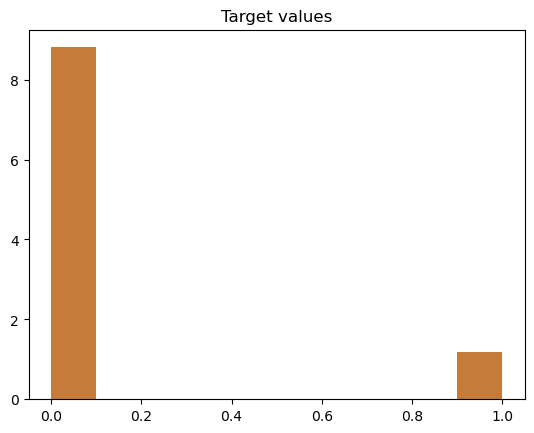

In [20]:
#TODO: visualiser y_train og y_test i et histogram

# Kode fra forelesning 1 - viser at test og train verdiene er likt distribuert
plt.title("Target values")
plt.hist(y_train, density=True, color="C0", label="train")
plt.hist(y_test, density=True, color="C1", alpha=0.75, label="val")
plt.show()

**Svar:**

Her ser det ut som det er "2" forskjellige verdier vi kan få, dermed er det klassifiserings problem og at dette er ett "skjevt" datasett, betyr at vi har mye mer data med ett utfall

<span style='color:red '> Helt riktig! Target er en binær variabel og derfor er det er klassifiseringsproblem, og som du også bemerker så er dette er skjevfordelt datasett.  </span>

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


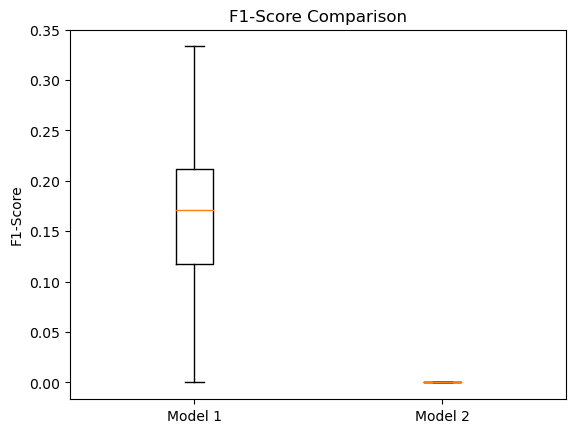

T-Statistic: 14.454174457479763
P-Value: 2.671118587815303e-19
There is a significant difference between the models.
Mean F1-Score Model 1: 0.1528883830169409
Mean F1-Score Model 2: 0.0


In [8]:
#TODO: repeterte kryssvalideringer for to modeller
# Kode fra ChatGPT 3.5

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt


# Define models
model1 = RandomForestClassifier()
model2 = SVC()

# Define cross-validation settings
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Define scoring metric
scoring = make_scorer(f1_score)

# Perform cross-validation for model 1
scores_model1 = cross_val_score(model1, X_train, y_train, cv=cv, scoring=scoring)

# Perform cross-validation for model 2
scores_model2 = cross_val_score(model2, X_train, y_train, cv=cv, scoring=scoring)

# Visualize F1-scores using a boxplot
plt.boxplot([scores_model1, scores_model2], labels=['Model 1', 'Model 2'])
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.show()

# Perform a paired t-test
t_stat, p_value = ttest_rel(scores_model1, scores_model2)

# Print the results of the t-test
print(f'T-Statistic: {t_stat}\nP-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference between the models.')
else:
    print('There is no significant difference between the models.')
    
mean_f1_model1 = np.mean(scores_model1)
mean_f1_model2 = np.mean(scores_model2)

print(f'Mean F1-Score Model 1: {mean_f1_model1}')
print(f'Mean F1-Score Model 2: {mean_f1_model2}')

**Svar:**

T-Statistic: 15.12389489478024

P-Value: 4.3244501895156724e-20

There is a significant difference between the models.

Mean F1-Score Model 1: 0.15445145795470375

Mean F1-Score Model 2: 0.0

Det er absolutt forskjell på modellene. Jeg fikk gjennomsnittlig F1-Score på model 2 (SVC) på 0.0 - det kan betyr at jeg har gjort noe galt eller at data er for ubalansert. Men det er fortsatt veldig dårlig score siden F1-score går fra 0(dårligst) til 1(best).

<span style='color:red '> Elegant løsning med bruk av $make\_scorer$ og $cross\_val\_score$. Alt er i prinsippet gjort rett, men jeg skulle ønske at du ble litt nysgjerrig på hva SVC "driver" med siden den får $F1score=0$ </span>

<span style='color:red '> Nedenfor har jeg trent og testet modellen og printet ut prediksjonene. Problemet med denne modellen er at den alltid ser ut til å predikere 0. Mest sannsynlig fordi 0 er den desiert største klassen i datasettet vårt. Noen modeller tilbøylige til å kjapt lære seg å bare klassifisere alle eksempler som  0. </span>

In [12]:
model2 = SVC()
model2.fit(X_train,y_train)
model2.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

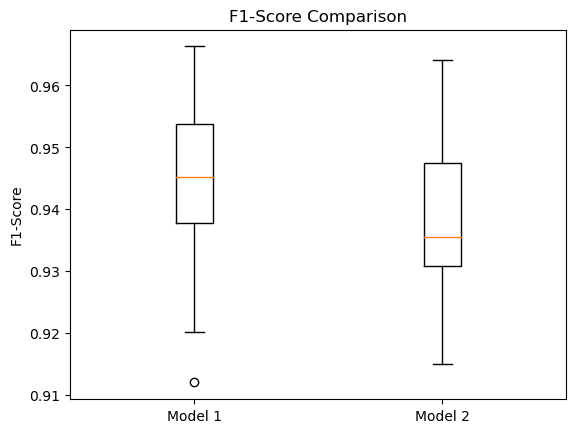

T-Statistic: 4.850923452550673
P-Value: 1.2873933110045327e-05
There is a significant difference between the models.
Mean F1-Score Model 1: 0.9446103591895013
Mean F1-Score Model 2: 0.9377264364652954


In [13]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

# Kode fra ChatGPT 3.5

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Assuming you already have X_train, y_train defined

# Apply SMOTE to balance the data
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define models
model1 = RandomForestClassifier()

# Define an SVC model with a pipeline for scaling
model2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, class_weight='balanced'))

# Define cross-validation settings
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Define scoring metric
scoring = make_scorer(f1_score)

# Perform cross-validation for model 1
scores_model1 = cross_val_score(model1, X_train_balanced, y_train_balanced, cv=cv, scoring=scoring)

# Perform cross-validation for model 2
scores_model2 = cross_val_score(model2, X_train_balanced, y_train_balanced, cv=cv, scoring=scoring)

# Visualize F1-scores using a boxplot
plt.boxplot([scores_model1, scores_model2], labels=['Model 1', 'Model 2'])
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.show()

# Perform a paired t-test
t_stat, p_value = ttest_rel(scores_model1, scores_model2)

# Print the results of the t-test
print(f'T-Statistic: {t_stat}\nP-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference between the models.')
else:
    print('There is no significant difference between the models.')

# Calculate and print the mean F1-score for each model
mean_f1_model1 = np.mean(scores_model1)
mean_f1_model2 = np.mean(scores_model2)

print(f'Mean F1-Score Model 1: {mean_f1_model1}')
print(f'Mean F1-Score Model 2: {mean_f1_model2}')


**Svar:**

T-Statistic: 3.885875182219462

P-Value: 0.00030621625354853183

There is a significant difference between the models.

Mean F1-Score Model 1: 0.9428733228890909

Mean F1-Score Model 2: 0.9377264364652954

Oi! Må bare kommentere at jeg ikke forventet at å "SMOTE" ut dataen ville ha så stor betydning her!
Nå kommer begge modellene ganske bra ut her! 

Det forsterker teorien om at model 2(SVC) oppe i tidligere oppgave ikke fungerte i det hele tatt pga ubalansert datasett, eller at det ikke var scala for SVC.

Men konklusjon hittil er at model 1 er best - RandomForestClassifier med F1-Score på 0.937

<span style='color:red '> Her går du i en liten felle som jeg prøvde å hjelpe dere med å unngå i første punktet av beskrivelsen av oppgaven - "bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene" </span>

<span style='color:red '>Å oppsample med SMOTE, basert på hele datasettet og deretter dele det oppsamplede i trening og validering kan føre til datalekkasje fordi de oppsamplede treningsdataene har elementer av valideringsdataene i seg. Dette gjør seg helt klart gjeldene i dette eksemplet. </span>

<span style='color:red '> I eksemplet nedenfor viser jeg en annen løsning der datalekkasje unngås </span>

In [21]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

f1_score_lr_SMOTE = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train, y_train)):    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    smote = SMOTE(random_state=0)
    X_train_balanced_cv, y_train_balanced_cv = smote.fit_resample(X_train_cv, y_train_cv)
    
    rfc = RandomForestClassifier().fit(X_train_balanced_cv,y_train_balanced_cv)
    f1_score_lr_SMOTE.append(f1_score(y_val_cv,rfc.predict(X_val_cv)))
f1_score_lr_SMOTE = np.asarray(f1_score_lr_SMOTE)

In [27]:
print("gjenommsnittlig F1-skår = {}, standardavvik = {}".format(f1_score_lr_SMOTE.mean().round(4),f1_score_lr_SMOTE.std().round(4)))

gjenommsnittlig F1-skår = 0.397, standardavvik = 0.0794


<span style='color:red '> Som du ser så er dette mer i tråd med hvilke resultater du får på testdataene nedenfor </span>

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [14]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

# Kode fra ChatGPT 3.5

from sklearn.metrics import (
    make_scorer, f1_score, accuracy_score,
    precision_score, recall_score, confusion_matrix
)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the RandomForestClassifier model
rf_model = RandomForestClassifier()

# Perform cross-validation with K=5
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=cv, scoring='f1')

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", scores)

# Retrain the RandomForestClassifier on the balanced training data
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix for sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the performance metrics
print("\nTest Set Performance Metrics:")
print(f'Precision: {precision}')
print(f'Recall (Sensitivity): {sensitivity}')
print(f'Specificity: {specificity}')
print(f'F1-Score: {f1}')
print(f'Accuracy: {accuracy}')

Cross-Validation F1 Scores: [0.94495413 0.93981481 0.94090909 0.93764434 0.92970522 0.92093023
 0.94831461 0.9569161  0.95945946 0.94930876 0.94382022 0.95890411
 0.95045045 0.94663573 0.9255814  0.96396396 0.93877551 0.92093023
 0.93548387 0.94688222 0.9212963  0.94545455 0.9476082  0.95454545
 0.95454545 0.95671982 0.93087558 0.93150685 0.94036697 0.9375
 0.93055556 0.9478458  0.95909091 0.93087558 0.95475113 0.96313364
 0.92970522 0.95238095 0.93518519 0.93981481 0.95652174 0.95632184
 0.94736842 0.94279176 0.93793103 0.9569161  0.93394077 0.94009217
 0.95259594 0.92873563]

Test Set Performance Metrics:
Precision: 0.5
Recall (Sensitivity): 0.3
Specificity: 0.9594594594594594
F1-Score: 0.37499999999999994
Accuracy: 0.8809523809523809


Jeg er usikker på hvorfor cross validation F1 scores er så høye, som i forrige oppgave. Når F1-Score for prediksjon ikke er så bra 0,39 

<span style='color:red '> Her gjør du alt rett, men du blir selvsagt litt forvirret fordi man skulle forventet bedre resultater basert på resultatene i forrige oppgave der vi opplevde en datalekkasje </span>

#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [15]:
#TODO: Gjør kjønnsbasert analyse på testdataene

# Kode fra ChatGPT 3.5 

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Assuming you have the predictions (y_pred) and true labels (y_test) for the entire test set

# Split the test set based on gender
women_indices = X_test['Gender'] == 1
men_indices = X_test['Gender'] == 0

X_test_women = X_test.loc[women_indices]
y_test_women = y_test[women_indices]

X_test_men = X_test.loc[men_indices]
y_test_men = y_test[men_indices]

# Predictions for women
y_pred_women = rf_model.predict(X_test_women)

# Predictions for men
y_pred_men = rf_model.predict(X_test_men)

# Calculate performance metrics for women
precision_women = precision_score(y_test_women, y_pred_women)
recall_women = recall_score(y_test_women, y_pred_women)
accuracy_women = accuracy_score(y_test_women, y_pred_women)
f1_women = f1_score(y_test_women, y_pred_women)

# Calculate confusion matrix for sensitivity and specificity for women
conf_matrix_women = confusion_matrix(y_test_women, y_pred_women)
tn_women, fp_women, fn_women, tp_women = conf_matrix_women.ravel()
sensitivity_women = tp_women / (tp_women + fn_women)
specificity_women = tn_women / (tn_women + fp_women)

# Print the performance metrics for women
print("Performance Metrics for Women:")
print(f'Precision: {precision_women}')
print(f'Recall (Sensitivity): {sensitivity_women}')
print(f'Specificity: {specificity_women}')
print(f'F1-Score: {f1_women}')
print(f'Accuracy: {accuracy_women}')

# Calculate performance metrics for men
precision_men = precision_score(y_test_men, y_pred_men)
recall_men = recall_score(y_test_men, y_pred_men)
accuracy_men = accuracy_score(y_test_men, y_pred_men)
f1_men = f1_score(y_test_men, y_pred_men)

# Calculate confusion matrix for sensitivity and specificity for men
conf_matrix_men = confusion_matrix(y_test_men, y_pred_men)
tn_men, fp_men, fn_men, tp_men = conf_matrix_men.ravel()
sensitivity_men = tp_men / (tp_men + fn_men)
specificity_men = tn_men / (tn_men + fp_men)

# Print the performance metrics for men
print("\nPerformance Metrics for Men:")
print(f'Precision: {precision_men}')
print(f'Recall (Sensitivity): {sensitivity_men}')
print(f'Specificity: {specificity_men}')
print(f'F1-Score: {f1_men}')
print(f'Accuracy: {accuracy_men}')

Performance Metrics for Women:
Precision: 0.5
Recall (Sensitivity): 0.2857142857142857
Specificity: 0.9738562091503268
F1-Score: 0.36363636363636365
Accuracy: 0.9161676646706587

Performance Metrics for Men:
Precision: 0.5
Recall (Sensitivity): 0.3055555555555556
Specificity: 0.9493087557603687
F1-Score: 0.37931034482758624
Accuracy: 0.857707509881423


##### Modellen er ulik for menn og kvinner
167 rader med kvinner i X_test
253 rader med menn i X_test

Så det første jeg ville ha gjort er å ha likt antall med begge kjønn i test settet med ca. lik aldersfordeling og antall år i jobb og utdanning. Så man har et balansert likt sett, hvor "bare" kjønnet er forskjellen så frem dette går.

<span style='color:red '> Helt riktig. Her er det en ubalanse i antall menn og kvinner i datasettet og dette ender ofte opp i en urettferdig modell, som får dårligere sensitivitet ovenfor kjønnet med færrest eksempler. Det finnes flere måter å balansere dette på. Noen eksempler er å 1) fjerne data fra datasettet slik at det blir lik fordeling mellom begge kjønnene. ulempen med dette er man potensielt lager en dårligere modell for å skape rettferdighet. 2) En annen mulighet er å oppsample dataene fra kjønnet med færrest eksempler. 3) For modeller trent med SGD kan man ofte vekte noen eksepler høyere enn andre i treningsprosessen. 4) lage en modell for hvert kjønn. Det finnes ingen fasitsvar på hva som er best her, så dette må testes empirisk.
  
</span>

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [53]:
!pip freeze > requirements.txt